In [1]:
import pandas as pd
from functools import reduce
import numpy as np
import altair as alt
import plotly.express as px

## 1- Read the registration data because it is what we have for previous years

- Population data came from estimates 2019: [ONS population estimates](https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationestimatesforukenglandandwalesscotlandandnorthernireland)
- 2020 deaths registeres in England and Wales came from: [ONS death registrations](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/bulletins/deathsregisteredweeklyinenglandandwalesprovisional/previousReleases), [this](https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/causesofdeath/datasets/deathregistrationsandoccurrencesbylocalauthorityandhealthboard) dataset in particular.
- Death registrations for 2015 to 2019: [ONS death information](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/adhocs/12615deathregistrationsandfiveyearaverageweeklydeathsbylocalauthorityandplaceofoccurrenceenglandandwales2015to2019)

In [44]:
#read 2020 data
df_20=pd.read_excel('lahbtablesweek51.xlsx', sheet_name='Registrations - All data', skiprows=3)
df_20.head()

,Area code,Geography type,Area name,Cause of death,Week number,Place of death,Number of deaths
0,E06000001,Local Authority,Hartlepool,All causes,1,Care home,8
1,E06000001,Local Authority,Hartlepool,All causes,1,Elsewhere,0
2,E06000001,Local Authority,Hartlepool,All causes,1,Home,2
3,E06000001,Local Authority,Hartlepool,All causes,1,Hospice,0
4,E06000001,Local Authority,Hartlepool,All causes,1,Hospital,18


In [45]:
df_20=df_20[df_20['Cause of death'] == 'All causes']

In [46]:
len(df_20['Area code'].unique())

343

In [47]:
df_20.columns

Index(['Area code', 'Geography type', 'Area name ', 'Cause of death',
       'Week number', 'Place of death', 'Number of deaths'],
      dtype='object')

In [48]:
#count NAs
df_20['Number of deaths'].isnull().value_counts()

False    104958
Name: Number of deaths, dtype: int64

In [49]:
#make england rows
weeks=df_20['Week number'].unique().tolist()

for w in weeks:
    new_row = {'Area code':'E92000001', 'Geography type':'country', 'Area name ': 'England', 'Cause of death': 'All causes', 
              'Week number':w, 'Number of deaths':np.sum(df_20[(df_20['Week number'] == w) & (df_20['Area code'].str.contains('E'))]['Number of deaths']) }
#append row to the dataframe
    df_20 = df_20.append(new_row, ignore_index=True)


In [50]:
#make wales rows:
weeks=df_20['Week number'].unique().tolist()

for w in weeks:
    new_row = {'Area code':'W92000004', 'Geography type':'country', 'Area name ': 'Wales', 'Cause of death': 'All causes', 
              'Week number':w, 'Number of deaths':np.sum(df_20[(df_20['Week number'] == w) & (df_20['Area code'].str.contains('W'))]['Number of deaths']) }
#append row to the dataframe
    df_20 = df_20.append(new_row, ignore_index=True)

In [51]:
#make function:
def get_total(df):
    weeks=df['Week Number'].unique().tolist()
    cds=['E', 'W']
    for w in weeks:
        for c in cds:
            if c == 'E':
                new_row = {'Area Code':'E92000001', 'Area Name': 'England','Week Number':w , 
                   'Death registrations':np.sum(df[(df['Week Number'] == w) & (df['Area Code'].str.contains('E'))]['Death registrations']) }
    #append row to the dataframe
                df=df.append(new_row, ignore_index=True)
            else:
                new_row = {'Area Code':'W92000004', 'Area Name': 'Wales','Week Number':w , 
                   'Death registrations':np.sum(df[(df['Week Number'] == w) & (df['Area Code'].str.contains('W'))]['Death registrations']) }
    #append row to the dataframe
                df=df.append(new_row, ignore_index=True)
    return df

In [52]:
#alternative function:
def gt(df):
    weeks=df['Week Number'].unique().tolist()
    cds=['E', 'W']
    for w in weeks:
        for c in cds:
            if c == 'E':
                new_row = {'Area Code':'E92000001', 'Area Name': 'England','Week Number':w , 
                   'Death registrations':np.sum(df[(df['Week Number'] == w) & (df['Area Code'].str.contains('E'))]['Death registrations']) }
    #append row to the dataframe
                df=df.append(new_row, ignore_index=True)
            if c =='W':
                new_row = {'Area Code':'W92000004', 'Area Name': 'Wales','Week Number':w , 
                   'Death registrations':np.sum(df[(df['Week Number'] == w) & (df['Area Code'].str.contains('W'))]['Death registrations']) }
    #append row to the dataframe
                df=df.append(new_row, ignore_index=True)
    return df

In [53]:
#group by local authority
df_20_gp=df_20.groupby(['Area code','Area name ', 'Week number'])['Number of deaths'].sum().reset_index(name='reg_deaths_20')

In [54]:
df_20_gp.columns=[c.replace(' ', '_') for c in df_20_gp.columns]

In [55]:
df_20_gp.columns=['Area_Code', 'Area_Name', 'Week_Number', 'reg_deaths_20' ]

In [56]:
df_20_gp.head()

,Area_Code,Area_Name,Week_Number,reg_deaths_20
0,E06000001,Hartlepool,1,28
1,E06000001,Hartlepool,2,25
2,E06000001,Hartlepool,3,32
3,E06000001,Hartlepool,4,19
4,E06000001,Hartlepool,5,20


In [57]:
#read te old data 
df_15=pd.read_excel('data.xlsx', sheet_name='Table 2', skiprows=11)


In [284]:
len(df_15['Area Code'].unique())

339

In [301]:
'Somerset' in list(df_15['Area Name'].unique())

False

In [302]:
lad_c=pd.read_csv('Local_Authority_Districts__December_2017__Names_and_Codes_in_the_United_Kingdom.csv')
lad_c.head()

,LAD17CD,LAD17NM,LAD17NMW,FID
0,N09000011,Ards and North Down,NaN,1
1,E06000001,Hartlepool,NaN,2
2,S12000005,Clackmannanshire,NaN,3
3,S12000006,Dumfries and Galloway,NaN,4
4,S12000008,East Ayrshire,NaN,5


In [306]:

len(lad_c[lad_c['LAD17CD'].str.contains('E')])

326

In [307]:
'Somerset' in list(lad_c['LAD17NM'].unique())

False

In [58]:
df_15.columns

Index(['Area Code', 'Area Name', 'Week Number', 'Place of occurrence',
       'Death registrations'],
      dtype='object')

In [59]:
test=gt(df_15)

In [60]:
df_15=get_total(df_15)

In [67]:
all(df_15 == test)

True

In [66]:
from pandas.testing import assert_frame_equal

assert_frame_equal(df_15, test, check_dtype=False)

In [15]:
#get missing values
df_15['Death registrations'].isnull().value_counts()


False    107908
Name: Death_registrations, dtype: int64

In [198]:
df_15.tail()

,Area Code,Area Name,Week Number,Place of occurrence,Death registrations
107903,W92000004,Wales,51,NaN,646
107904,E92000001,England,52,NaN,8077
107905,W92000004,Wales,52,NaN,535
107906,E92000001,England,53,NaN,6981
107907,W92000004,Wales,53,NaN,516


In [199]:
df_15_gp=df_15.groupby(['Area Code', 'Area Name', 'Week Number'])['Death registrations'].sum().reset_index(name='reg_deaths_15')
df_15_gp.columns=[c.replace(' ', '_') for c in df_15_gp.columns]
df_15_gp.head()

,Area_Code,Area_Name,Week_Number,reg_deaths_15
0,E06000001,Hartlepool,1,25
1,E06000001,Hartlepool,2,23
2,E06000001,Hartlepool,3,35
3,E06000001,Hartlepool,4,34
4,E06000001,Hartlepool,5,40


In [16]:
df_16=pd.read_excel('data.xlsx', sheet_name='Table 4', skiprows=11)
df_16.head()

,Area Code,Area Name,Week Number,Place of occurrence,Death registrations
0,E06000001,Hartlepool,1,Care home,2
1,E06000001,Hartlepool,1,Elsewhere,1
2,E06000001,Hartlepool,1,Home,4
3,E06000001,Hartlepool,1,Hospice,1
4,E06000001,Hartlepool,1,Hospital,11


In [288]:
len(df_16['Area Code'].unique())

339

In [17]:
df_16=get_total(df_16)

In [20]:
df_16['Death_registrations'].isnull().value_counts()

False    105872
Name: Death_registrations, dtype: int64

In [202]:
df_16_gp=df_16.groupby(['Area Code', 'Area Name', 'Week Number'])['Death registrations'].sum().reset_index(name='reg_deaths_16')
df_16.columns=[c.replace(' ', '_') for c in df_16.columns]
df_16_gp.head()

,Area_Code,Area_Name,Week_Number,reg_deaths_16
0,E06000001,Hartlepool,1,19
1,E06000001,Hartlepool,2,20
2,E06000001,Hartlepool,3,20
3,E06000001,Hartlepool,4,20
4,E06000001,Hartlepool,5,24


In [21]:
df_17=pd.read_excel('data.xlsx', sheet_name='Table 5', skiprows=11)
df_17.head()

,Area Code,Area Name,Week Number,Place of occurrence,Death registrations
0,E06000001,Hartlepool,1,Care home,6
1,E06000001,Hartlepool,1,Elsewhere,0
2,E06000001,Hartlepool,1,Home,9
3,E06000001,Hartlepool,1,Hospice,0
4,E06000001,Hartlepool,1,Hospital,14


In [293]:
len(df_17['Area Code'].unique())

339

In [22]:
df_17=get_total(df_17)

In [24]:
#Check for NAs
df_17['Death_registrations'].isnull().value_counts()

False    105872
Name: Death_registrations, dtype: int64

In [205]:
df_17_gp=df_17.groupby(['Area Code', 'Area Name', 'Week Number'])['Death registrations'].sum().reset_index(name='reg_deaths_17')
df_17_gp.columns=[c.replace(' ', '_') for c in df_17_gp.columns]
df_17_gp.head()

,Area_Code,Area_Name,Week_Number,reg_deaths_17
0,E06000001,Hartlepool,1,29
1,E06000001,Hartlepool,2,27
2,E06000001,Hartlepool,3,25
3,E06000001,Hartlepool,4,28
4,E06000001,Hartlepool,5,20


In [25]:
df_18=pd.read_excel('data.xlsx', sheet_name='Table 6', skiprows=11)
df_18.head()

,Area Code,Area Name,Week Number,Place of occurrence,Death registrations
0,E06000001,Hartlepool,1,Care home,8
1,E06000001,Hartlepool,1,Elsewhere,0
2,E06000001,Hartlepool,1,Home,7
3,E06000001,Hartlepool,1,Hospice,2
4,E06000001,Hartlepool,1,Hospital,17


In [292]:
len(df_18['Area Code'].unique())

339

In [26]:
df_18=get_total(df_18)

In [28]:
#check for NAs
df_18['Death_registrations'].isnull().value_counts()

False    105872
Name: Death_registrations, dtype: int64

In [208]:
df_18_gp=df_18.groupby(['Area Code', 'Area Name', 'Week Number'])['Death registrations'].sum().reset_index(name='reg_deaths_18')
df_18.columns=[c.replace(' ', '_') for c in df_18.columns]
df_18_gp.head()

,Area_Code,Area_Name,Week_Number,reg_deaths_18
0,E06000001,Hartlepool,1,34
1,E06000001,Hartlepool,2,22
2,E06000001,Hartlepool,3,17
3,E06000001,Hartlepool,4,31
4,E06000001,Hartlepool,5,32


In [29]:
df_19=pd.read_excel('data.xlsx', sheet_name='Table 7', skiprows=11)
df_19.head()

,Area Code,Area Name,Week Number,Place of occurrence,Death registrations
0,E06000001,Hartlepool,1,Care home,4
1,E06000001,Hartlepool,1,Elsewhere,1
2,E06000001,Hartlepool,1,Home,3
3,E06000001,Hartlepool,1,Hospice,0
4,E06000001,Hartlepool,1,Hospital,8


In [295]:
len(df_19['Area Code'].unique())

339

In [30]:
df_19=get_total(df_19)

In [32]:
#Check for NAs
df_19['Death_registrations'].isnull().value_counts()

False    105872
Name: Death_registrations, dtype: int64

In [211]:
df_19_gp=df_19.groupby(['Area Code', 'Area Name', 'Week Number'])['Death registrations'].sum().reset_index(name='reg_deaths_19')
df_19_gp.columns=[c.replace(' ', '_') for c in df_19_gp.columns]
df_19_gp.head()

,Area_Code,Area_Name,Week_Number,reg_deaths_19
0,E06000001,Hartlepool,1,16
1,E06000001,Hartlepool,2,22
2,E06000001,Hartlepool,3,25
3,E06000001,Hartlepool,4,12
4,E06000001,Hartlepool,5,25


## 2- Merge dataframes

In [212]:
df_list=[df_15_gp, df_16_gp, df_17_gp, df_18_gp, df_19_gp]

In [213]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Area_Code', 'Area_Name', 'Week_Number'],
                                            how='inner'), df_list)
df_merged.head()

,Area_Code,Area_Name,Week_Number,reg_deaths_15,reg_deaths_16,reg_deaths_17,reg_deaths_18,reg_deaths_19
0,E06000001,Hartlepool,1,25,19,29,34,16
1,E06000001,Hartlepool,2,23,20,27,22,22
2,E06000001,Hartlepool,3,35,20,25,17,25
3,E06000001,Hartlepool,4,34,20,28,31,12
4,E06000001,Hartlepool,5,40,24,20,32,25


In [214]:
df_merged['avg_reg_deaths_15_19']=df_merged[['reg_deaths_15', 'reg_deaths_16', 'reg_deaths_17', 'reg_deaths_18', 'reg_deaths_19']].mean(axis=1)
df_merged.head()

,Area_Code,Area_Name,Week_Number,reg_deaths_15,reg_deaths_16,reg_deaths_17,reg_deaths_18,reg_deaths_19,avg_reg_deaths_15_19
0,E06000001,Hartlepool,1,25,19,29,34,16,24.6
1,E06000001,Hartlepool,2,23,20,27,22,22,22.8
2,E06000001,Hartlepool,3,35,20,25,17,25,24.4
3,E06000001,Hartlepool,4,34,20,28,31,12,25.0
4,E06000001,Hartlepool,5,40,24,20,32,25,28.2


In [215]:
df_merged=reduce(lambda left, right:pd.merge(left, right, on=['Area_Code', 'Area_Name', 'Week_Number'], how='inner'), [df_merged, df_20_gp])
df_merged.head()

,Area_Code,Area_Name,Week_Number,reg_deaths_15,reg_deaths_16,reg_deaths_17,reg_deaths_18,reg_deaths_19,avg_reg_deaths_15_19,reg_deaths_20
0,E06000001,Hartlepool,1,25,19,29,34,16,24.6,28
1,E06000001,Hartlepool,2,23,20,27,22,22,22.8,25
2,E06000001,Hartlepool,3,35,20,25,17,25,24.4,32
3,E06000001,Hartlepool,4,34,20,28,31,12,25.0,19
4,E06000001,Hartlepool,5,40,24,20,32,25,28.2,20


In [216]:
#create excess deaths column
df_merged['Excess_2020_from_avg']=df_merged['reg_deaths_20']-df_merged['avg_reg_deaths_15_19']

In [217]:
#get population data to get the number of excess deaths per 100,000 of population
#get population data to make plots adjusted per 100,000 people
pop=pd.read_excel('ukmidyearestimates20192020ladcodes.xls', sheet_name='MYE3', skiprows=[0, 1, 2, 3],
                 usecols=[0, 1, 2, 14])
pop.head()

,Code,Name,Geography1,Estimated Population mid-2019
0,K02000001,UNITED KINGDOM,Country,66796807.0
1,K03000001,GREAT BRITAIN,Country,64903140.0
2,K04000001,ENGLAND AND WALES,Country,59439840.0
3,E92000001,ENGLAND,Country,56286961.0
4,E12000001,NORTH EAST,Region,2669941.0


In [280]:
pop['Geography1'].value_counts()

Non-metropolitan District    188
Unitary Authority             79
Metropolitan District         36
London Borough                33
Council Area                  32
County                        25
Local Government District     11
Region                         9
Country                        7
Metropolitan County            6
Name: Geography1, dtype: int64

In [ ]:
pop[pop['Geography1'] != ]

In [218]:
pop.columns=[c.replace(' ', '_') for c in pop.columns]
pop.columns

Index(['Code', 'Name', 'Geography1', 'Estimated_Population__mid-2019'], dtype='object')

In [243]:

#TODO this needs to be adapted to the death_df
with_pop=pd.merge(df_merged, pop, how='left', left_on=['Area_Code'], right_on='Code')
with_pop=with_pop.drop(columns=['Name', 'Geography1', 'Code'])
with_pop=with_pop.rename(columns={'Estimated_Population__mid-2019':'estimated_2019_pop'})

with_pop['excess_deaths_per_100t_20']=with_pop['Excess_2020_from_avg']/with_pop['estimated_2019_pop']*100000
#with_pop=with_pop.sort_values(by='excess_deaths_per_100t_20', ascending = False)
with_pop.head()

,Area_Code,Area_Name,Week_Number,reg_deaths_15,reg_deaths_16,reg_deaths_17,reg_deaths_18,reg_deaths_19,avg_reg_deaths_15_19,reg_deaths_20,Excess_2020_from_avg,estimated_2019_pop,excess_deaths_per_100t_20
0,E06000001,Hartlepool,1,25,19,29,34,16,24.6,28,3.4,93663.0,3.630035
1,E06000001,Hartlepool,2,23,20,27,22,22,22.8,25,2.2,93663.0,2.348846
2,E06000001,Hartlepool,3,35,20,25,17,25,24.4,32,7.6,93663.0,8.114197
3,E06000001,Hartlepool,4,34,20,28,31,12,25.0,19,-6.0,93663.0,-6.405945
4,E06000001,Hartlepool,5,40,24,20,32,25,28.2,20,-8.2,93663.0,-8.754791


In [244]:
#calculate total excess deaths per 100, 000 people in 2020:

t=round(np.sum(with_pop[with_pop['Area_Name'] == 'Hackney']['excess_deaths_per_100t_20']), 1)
t

93.4

In [245]:
#save as csv:
with_pop.to_csv( 'excess_deaths_uk_w51.csv', index=False)

In [279]:
len(with_pop['Area_Name'].unique())

337

In [246]:
e=pd.read_csv('excess_deaths_uk_w51.csv')

In [257]:
df_maps=e[~e['Area_Name'].isin(['Wales', 'England'])]

In [250]:
df_maps.columns

Index(['Area_Code', 'Area_Name', 'Week_Number', 'reg_deaths_15',
       'reg_deaths_16', 'reg_deaths_17', 'reg_deaths_18', 'reg_deaths_19',
       'avg_reg_deaths_15_19', 'reg_deaths_20', 'Excess_2020_from_avg',
       'estimated_2019_pop', 'excess_deaths_per_100t_20'],
      dtype='object')

In [253]:
list(df_maps[df_maps['Area_Name'] == 'Hackney']['Area_Code'])[0]

'E09000012'

In [261]:
list(df_maps[df_maps['Area_Name'] == 'Hackney']['estimated_2019_pop'])[0]

281120.0

In [262]:
#make england rows
lads=df_maps['Area_Name'].unique().tolist()

for l in lads:
    new_row = {'Area_Code': list(df_maps[df_maps['Area_Name'] == l]['Area_Code'])[0], 
               'Area_Name ': l, 
              'Week_Number':53, 
               'reg_deaths_15':np.sum(df_maps[df_maps['Area_Name'] == l]['reg_deaths_15']),
               'reg_deaths_16':np.sum(df_maps[df_maps['Area_Name'] == l]['reg_deaths_16']), 
                'reg_deaths_17':np.sum(df_maps[df_maps['Area_Name'] == l]['reg_deaths_17']),
                'reg_deaths_18':np.sum(df_maps[df_maps['Area_Name'] == l]['reg_deaths_18']), 
                'reg_deaths_19': np.sum(df_maps[df_maps['Area_Name'] == l]['reg_deaths_19']),
       'avg_reg_deaths_15_19':np.sum(df_maps[df_maps['Area_Name'] == l]['avg_reg_deaths_15_19']),
        'reg_deaths_20': np.sum(df_maps[df_maps['Area_Name'] == l]['reg_deaths_20']), 
        'Excess_2020_from_avg':np.sum(df_maps[df_maps['Area_Name'] == l]['Excess_2020_from_avg']),
       'estimated_2019_pop': list(df_maps[df_maps['Area_Name'] == l]['estimated_2019_pop'])[0],
        'excess_deaths_per_100t_20': np.sum(df_maps[df_maps['Area_Name'] == l]['excess_deaths_per_100t_20'])}
#append row to the dataframe
    df_maps = df_maps.append(new_row, ignore_index=True)


,Area_Code,Area_Name,Week_Number,reg_deaths_15,reg_deaths_16,reg_deaths_17,reg_deaths_18,reg_deaths_19,avg_reg_deaths_15_19,reg_deaths_20,Excess_2020_from_avg,estimated_2019_pop,excess_deaths_per_100t_20
17131,W06000024,Merthyr Tydfil,47,13,13,3,15,16,12.0,21,9.0,60326.0,14.918940
17132,W06000024,Merthyr Tydfil,48,11,15,11,15,8,12.0,14,2.0,60326.0,3.315320
17133,W06000024,Merthyr Tydfil,49,5,15,14,14,8,11.2,18,6.8,60326.0,11.272088
17134,W06000024,Merthyr Tydfil,50,9,9,9,11,12,10.0,17,7.0,60326.0,11.603620
17135,W06000024,Merthyr Tydfil,51,10,15,16,15,22,15.6,22,6.4,60326.0,10.609024


In [309]:
min(df_maps['excess_deaths_per_100t_20'])

-206.8345323741007

In [310]:
max(df_maps['excess_deaths_per_100t_20'])

266.0627283800244

In [311]:
test=df_maps.set_index('Week_Number')

In [313]:
test_w1= pd.DataFrame(test.iloc[1,:])

In [315]:
test_w1

,2
Area_Code,E06000001
Area_Name,Hartlepool
reg_deaths_15,23
reg_deaths_16,20
reg_deaths_17,27
reg_deaths_18,22
reg_deaths_19,22
avg_reg_deaths_15_19,22.8
reg_deaths_20,25
Excess_2020_from_avg,2.2


In [312]:
test.head()

,Area_Code,Area_Name,reg_deaths_15,reg_deaths_16,reg_deaths_17,reg_deaths_18,reg_deaths_19,avg_reg_deaths_15_19,reg_deaths_20,Excess_2020_from_avg,estimated_2019_pop,excess_deaths_per_100t_20,Area_Name,lad17nm
Week_Number,,,,,,,,,,,,,,
1,E06000001,Hartlepool,25,19,29,34,16,24.6,28,3.4,93663.0,3.630035,NaN,Hartlepool
2,E06000001,Hartlepool,23,20,27,22,22,22.8,25,2.2,93663.0,2.348846,NaN,Hartlepool
3,E06000001,Hartlepool,35,20,25,17,25,24.4,32,7.6,93663.0,8.114197,NaN,Hartlepool
4,E06000001,Hartlepool,34,20,28,31,12,25.0,19,-6.0,93663.0,-6.405945,NaN,Hartlepool
5,E06000001,Hartlepool,40,24,20,32,25,28.2,20,-8.2,93663.0,-8.754791,NaN,Hartlepool


## 3- Make plots

In [27]:
import plotly.express as px
import plotly
import plotly.graph_objects as go

### Test with one LAD

In [30]:
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)


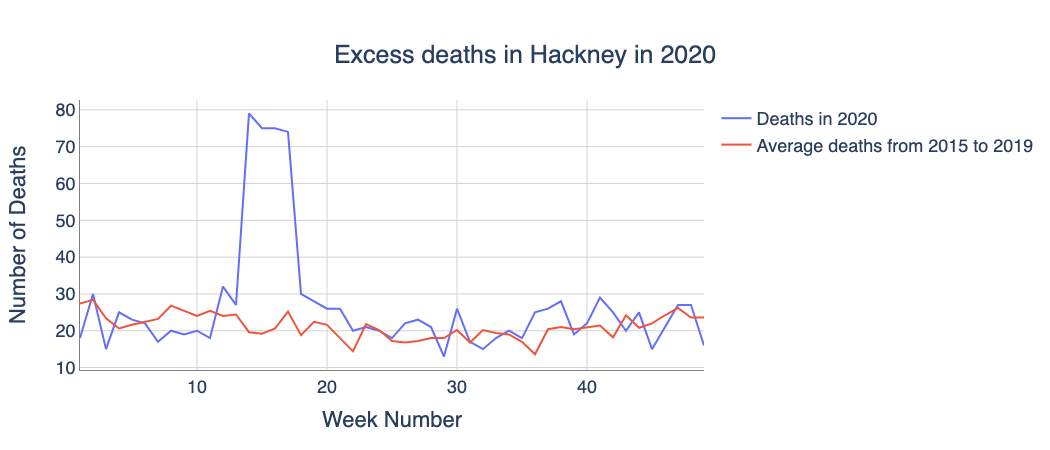

In [132]:
hack=df_merged[df_merged['Area_Name'] == 'Hackney']
trace0 = go.Scatter(
x=hack['Week_Number'],
y=hack['reg_deaths_20'],
mode='lines',
name='Deaths in 2020'
)
trace1 = go.Scatter(
x=hack['Week_Number'],
y=hack['avg_reg_deaths_15_19'],
mode='lines',
name='Average deaths from 2015 to 2019'
)
data=[trace0, trace1]
layout=go.Layout(title={'text': f"Excess deaths in {'Hackney'} in 2020",'y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Week Number',
                yaxis_title='Number of Deaths',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )
fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
iplot(fig)

## Chloropleth map

In [269]:
import json
with open('assets/Local_Authority_Districts_(December_2017)_Generalised_Clipped_Boundaries_in_Great_Britain.geojson') as f:
    const = json.load(f)